# First light analysis

Stowed Some CRC errors in links on correlator. 
I thnk ak03 was in but this stage.
shelf 7 card 1 fpga 1 was downloaded with cardcap.py

Frequencies 
```
$ !caget
caget ak:acx:s07:c01:F_processCorrelations:skyFreqList
ak:acx:s07:c01:F_processCorrelations:skyFreqList 216 983.5 983.519 983.537 983.556 983.574 983.593 983.611 983.63 983.648 984.5 984.519 984.537 984.556 984.574 984.593 984.611 984.63 984.648 985.5 985.519 985.537 985.556 985.574 985.593 985.611 985.63 985.648 986.5 986.519 986.537 986.556 986.574 986.593 986.611 986.63 986.648 983.667 983.685 983.704 983.722 983.741 983.759 983.778 983.796 983.815 984.667 984.685 984.704 984.722 984.741 984.759 984.778 984.796 984.815 985.667 985.685 985.704 985.722 985.741 985.759 985.778 985.796 985.815 986.667 986.685 986.704 986.722 986.741 986.759 986.778 986.796 986.815 983.833 983.852 983.87 983.889 983.907 983.926 983.944 983.963 983.981 984.833 984.852 984.87 984.889 984.907 984.926 984.944 984.963 984.981 985.833 985.852 985.87 985.889 985.907 985.926 985.944 985.963 985.981 986.833 986.852 986.87 986.889 986.907 986.926 986.944 986.963 986.981 984 984.019 984.037 984.056 984.074 984.093 984.111 984.13 984.148 985 985.019 985.037 985.056 985.074 985.093 985.111 985.13 985.148 986 986.019 986.037 986.056 986.074 986.093 986.111 986.13 986.148 987 987.019 987.037 987.056 987.074 987.093 987.111 987.13 987.148 984.167 984.185 984.204 984.222 984.241 984.259 984.278 984.296 984.315 985.167 985.185 985.204 985.222 985.241 985.259 985.278 985.296 985.315 986.167 986.185 986.204 986.222 986.241 986.259 986.278 986.296 986.315 987.167 987.185 987.204 987.222 987.241 987.259 987.278 987.296 987.315 984.333 984.352 984.37 984.389 984.407 984.426 984.444 984.463 984.481 985.333 985.352 985.37 985.389 985.407 985.426 985.444 985.463 985.481 986.333 986.352 986.37 986.389 986.407 986.426 986.444 986.463 986.481 987.333 987.352 987.37 987.389 987.407 987.426 987.444 987.463 987.481
```
craigh haskins put in a kludge to use py-epics and some EPICS variables so seren could talk epics from a different subnet

```
$ env | grep EPICS
EPICS_CA_NAME_SERVERS=alderman:35021 bolton:41037
EPICS_CA_ADDR_LIST=202.9.13.223
EPICS_CA_MAX_ARRAY_BYTES=12000000
EPICS_CA_AUTO_ADDR_LIST=NO
```



In [2]:
import numpy as np
from astropy.io import fits

from pylab import *
import glob
%matplotlib notebook

In [79]:
!ls short

sky2-dbghdr-lsb11-dp-card1.fits  sky-debughdr-sumpol0.fits
sky2-dbghdr-lsb11-dp-card8.fits  sky-debughdr-testdata.fits
sky2-dbghdr-lsb-dp.fits		 sky-debughdr-tsamp16.fits
sky-debughdr.fits		 sky-debughdr-tsamp32.fits
sky-debughdr-lsb12.fits		 sky-debughdr-tsamp64.fits
sky-debughdr-lsb4.fits


In [169]:
fname = 'short/sky-debughdr.fits'
fname = 'short/sky2-dbghdr-lsb11-dp-card1.fits'
fname = 'sky3-debughdr-card1-lsb11-dp.fits'


hdr = fits.getheader(fname, 1)
print(hdr)
print(len(str(hdr)))

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 3752 / length of dimension 1                          NAXIS2  =                36864 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   12 / number of table fields                         TTYPE1  = 'frame_id'                                                            TFORM1  = 'K       '                                                            TZERO1  =                    0                                                  TTYPE2  = 'bat     '                                                            TFORM2  = 'K       '                    

In [170]:
from craco.cardcap import get_single_packet_dtype
nant = 30
npol = 1
samp_per_int = 32 # samples per integration = 
samp_per_frame = 2048
int_per_frame = samp_per_frame // samp_per_int
nprod = nant*(nant+1)//2*npol
nprod = 930
print(f'nprod={nprod}')
packet_headers = True
packets_per_frame = int_per_frame * 36 * 4
print(packets_per_frame)
dtype = get_single_packet_dtype(nprod, packet_headers, False)


dtype

nprod=930
9216


dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 930, 2, 2))])

In [214]:
N = 1000*8*8

def load(fname, dtype, count=-1):
    hdr  = fits.getheader(fname)
    hdr_nbytes = len(str(hdr))    
    hdr_nbytes = 3*2880
    with open(fname) as f:
        f = open(fname)       
        print(hdr_nbytes)
        f.seek(hdr_nbytes)
        print(hdr)
        packets = np.fromfile(f, dtype=dtype, count=count)
        return packets
    


packets = load('short/sky-debughdr.fits', get_single_packet_dtype(435, True))
packets_lsb12 = load('short/sky-debughdr-lsb12.fits', get_single_packet_dtype(435, False))
packets_lsb4 = load('short/sky-debughdr-lsb4.fits', get_single_packet_dtype(435, False))
packets_tst = load('short/sky-debughdr-testdata.fits', get_single_packet_dtype(435, True))
packets_matst = load('mates-debughdr-testdata.fits', get_single_packet_dtype(435, True))
packets = load('sky3-debughdr-card1-lsb11-dp.fits',get_single_packet_dtype(465, True, False))

print(packets.dtype)
print(packets.itemsize)

import glob
for f in glob.glob('data/SB40678/0407/*.fits'):
    dbghdr = 'debughdr' in f
    polsum = '-ps' in f
    dtype = get_single_packet_dtype(465, dbghdr, polsum)
    N = 100000
    packets = load(f, dtype, -1)
    fout = f.replace('.fits','.npy')
    print(f'saving {f} to {fout}')
    np.save(fout, packets)
    b0 = packets[packets['beam_number'] == 0]
    fout = fout.replace('.npy','_b0.npy')
    print(f'saving beam0 to {fout}')
    np.save(fout, b0)
    




8640
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

8640
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

saving data/SB40678/0407/0407-debughdr-card8-lsb11-ps.fits to data/SB40678/0407/0407-debughdr-card8-lsb11-ps.npy
saving beam0 to data/SB40678/0407/0407-debughdr-card8-lsb11-ps_b0.npy
8640
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

saving data/SB40678/0407/0407-debughdr-card8-lsb11-dp.fits to data/SB40678/0407/0407-debughdr-card8-lsb11-dp.npy
saving beam0 to data/SB40678/0407/0407-debughdr-card8-lsb11-dp_b0.npy


In [203]:
np.fromfile?

In [173]:
packets.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 465, 2, 2))])

In [174]:
packets['data'].shape

(36864, 1, 465, 2, 2)

<IPython.core.display.Javascript object>


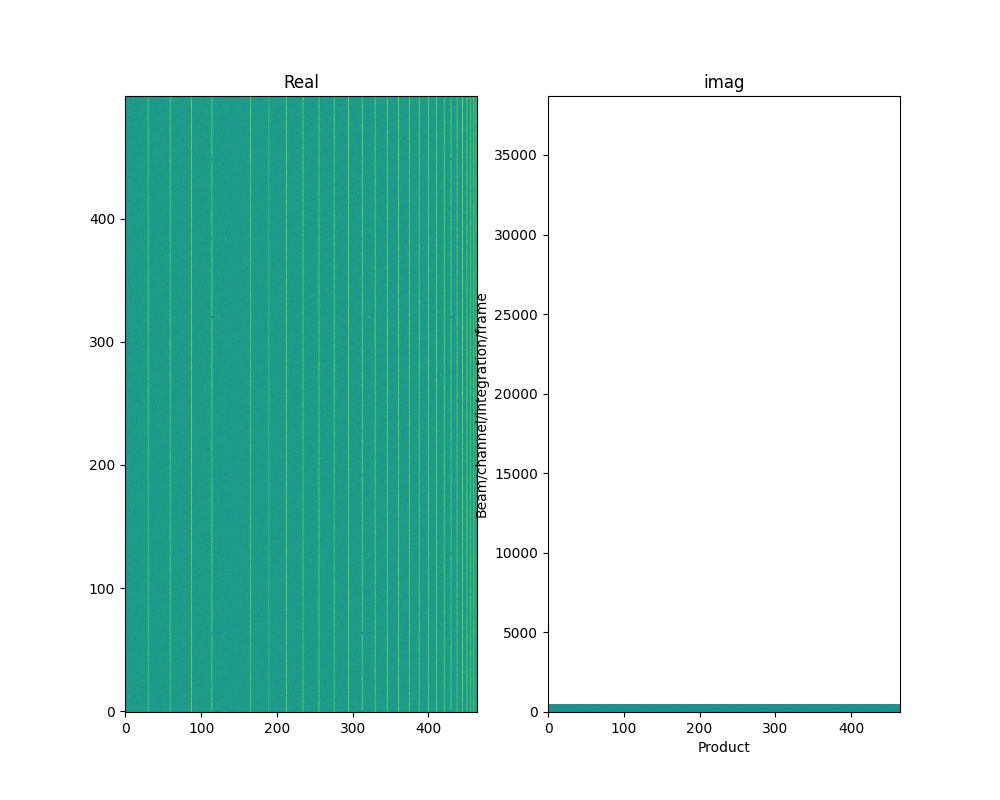

Text(0, 0.5, 'Beam/channel/integration/frame')

In [175]:
fig, ax = subplots(1,2)

N = 1000//2
ax[0].imshow(packets['data'][:N, 0,:,0,0], aspect='auto', origin='lower')
ax[1].imshow(packets['data'][:N, 0,:,0,1], aspect='auto', origin='lower')
ax[0].set_title('Real')
ax[1].set_title('imag')
fig.set_size_inches([10,8])
xlabel('Product')
ylabel('Beam/channel/integration/frame')

<IPython.core.display.Javascript object>


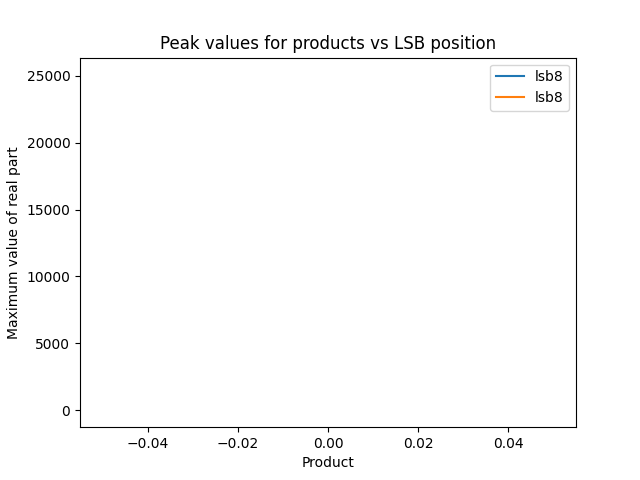

Text(0, 0.5, 'Maximum value of real part')

In [135]:
figure()
#plot(packets_lsb4['data'][:1000,:,0].max(axis=0), label='lsb4')
plot(packets['data'][:N,:,0,0].max(axis=0), label='lsb8')
#plot(packets_lsb12['data'][:1000,:,0].max(axis=0), label='lsb12')
legend()
title('Peak values for products vs LSB position')
xlabel('Product')
ylabel('Maximum value of real part')

<IPython.core.display.Javascript object>


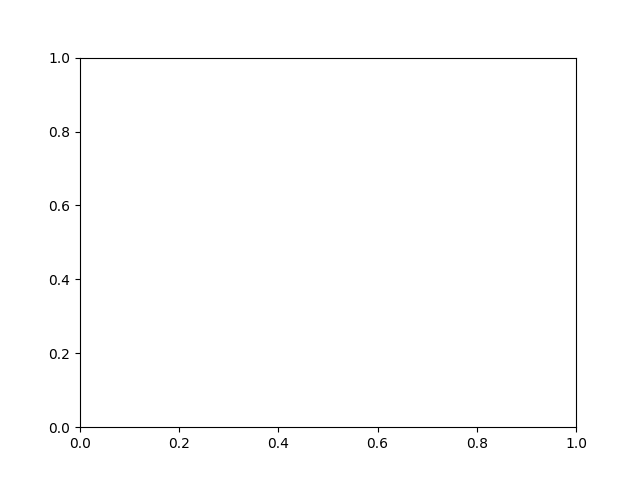

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 2, 2)

In [131]:
figure()
N = 100000
plot(packets_lsb4['data'][:N,:,0].std(axis=0), label='lsb4')
plot(packets['data'][:N,:,0].std(axis=0), label='lsb8')
plot(packets_lsb12['data'][:N,:,0].std(axis=0), label='lsb12')
legend()
title('STD products vs LSB position')
xlabel('Product')
ylabel('STD of real part')

In [132]:
print(packets['data'].shape)

(36864, 1, 465, 2, 2)


<IPython.core.display.Javascript object>


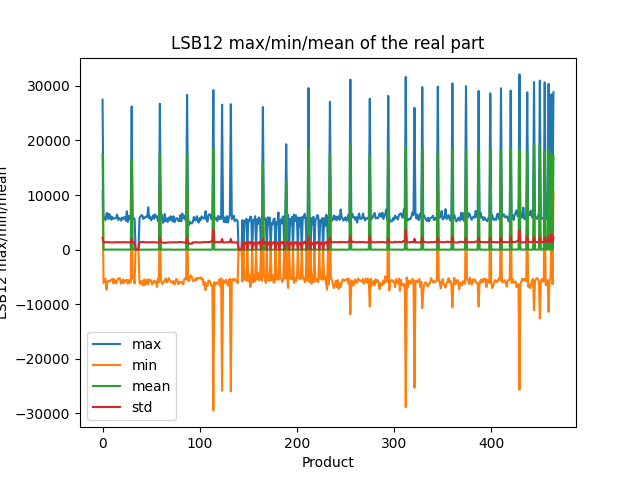

/data/craco/ban115/craco-python/notebooks/packets.npy
(27944, 465, 2)


<IPython.core.display.Javascript object>


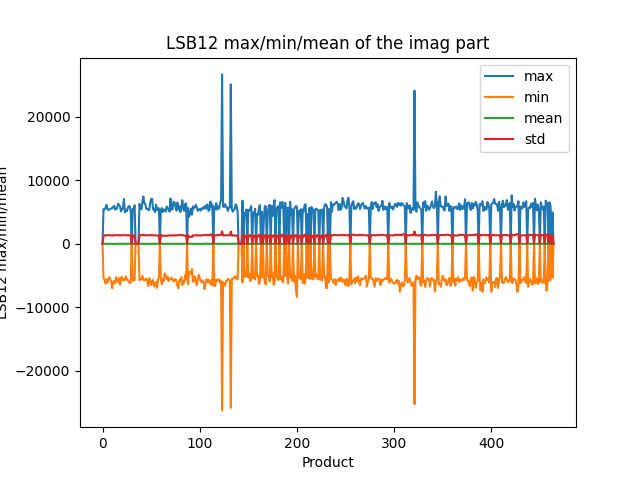

Text(0, 0.5, 'LSB12 max/min/mean')

In [209]:
figure()
d = packets['data'][:N,0,:,0,:]
np.save('packets.npy', packets)
!realpath packets.npy
print(d.shape)
plot(d[:,:,0].max(axis=0), label='max')
plot(d[:,:,0].min(axis=0), label='min')
plot(d[:,:,0].mean(axis=0), label='mean')
plot(d[:,:,0].std(axis=0), label='std')

legend()
title('LSB12 max/min/mean of the real part')
xlabel('Product')
ylabel('LSB12 max/min/mean')

figure()
plot(d[:,:,1].max(axis=0), label='max')
plot(d[:,:,1].min(axis=0), label='min')
plot(d[:,:,1].mean(axis=0), label='mean')
plot(d[:,:,1].std(axis=0), label='std')

legend()
title('LSB12 max/min/mean of the imag part')
xlabel('Product')
ylabel('LSB12 max/min/mean')

In [139]:
nant = 30
i = 0
products = []
prodids = {}
for a1 in range(nant):
    for a2 in range(a1, nant):
        print(f'{i} = {a1+1}-{a2+1}')
        i += 1
        products.append((a1+1, a2+1))
        prodids[(a1+1,a2+1)] = i
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])


0 = 1-1
1 = 1-2
2 = 1-3
3 = 1-4
4 = 1-5
5 = 1-6
6 = 1-7
7 = 1-8
8 = 1-9
9 = 1-10
10 = 1-11
11 = 1-12
12 = 1-13
13 = 1-14
14 = 1-15
15 = 1-16
16 = 1-17
17 = 1-18
18 = 1-19
19 = 1-20
20 = 1-21
21 = 1-22
22 = 1-23
23 = 1-24
24 = 1-25
25 = 1-26
26 = 1-27
27 = 1-28
28 = 1-29
29 = 1-30
30 = 2-2
31 = 2-3
32 = 2-4
33 = 2-5
34 = 2-6
35 = 2-7
36 = 2-8
37 = 2-9
38 = 2-10
39 = 2-11
40 = 2-12
41 = 2-13
42 = 2-14
43 = 2-15
44 = 2-16
45 = 2-17
46 = 2-18
47 = 2-19
48 = 2-20
49 = 2-21
50 = 2-22
51 = 2-23
52 = 2-24
53 = 2-25
54 = 2-26
55 = 2-27
56 = 2-28
57 = 2-29
58 = 2-30
59 = 3-3
60 = 3-4
61 = 3-5
62 = 3-6
63 = 3-7
64 = 3-8
65 = 3-9
66 = 3-10
67 = 3-11
68 = 3-12
69 = 3-13
70 = 3-14
71 = 3-15
72 = 3-16
73 = 3-17
74 = 3-18
75 = 3-19
76 = 3-20
77 = 3-21
78 = 3-22
79 = 3-23
80 = 3-24
81 = 3-25
82 = 3-26
83 = 3-27
84 = 3-28
85 = 3-29
86 = 3-30
87 = 4-4
88 = 4-5
89 = 4-6
90 = 4-7
91 = 4-8
92 = 4-9
93 = 4-10
94 = 4-11
95 = 4-12
96 = 4-13
97 = 4-14
98 = 4-15
99 = 4-16
100 = 4-17
101 = 4-18
102 = 4-19
103 = 4

In [220]:
autoidxs = np.where(d[:,:,0].max(axis=0) > 10000)[0]
autoidxs2 = np.where(d[:,:,1].max(axis=0) == 0)[0]

print(autoidxs)
print(autoidxs2)

print('High real part', products[autoidxs])
print('0 real part', products[np.where(d[:,:,0].max(axis=0) == 0)[0]])

print('0imag part', 
      products[autoidxs2])

imagidx = np.where(d[:,:,1].max(axis=0) > 10000)[0]
print('High imag part', 
      products[imagidx])



[  0  30  59  87 114 123 132 165 189 212 234 255 275 294 312 321 329 345
 360 374 387 399 410 420 429 437 444 450 455 459 462 464]
[  0  30  34  35  36  37  59  87 114 140 141 142 143 145 149 154 158 163
 165 169 173 178 182 187 189 192 196 201 205 210 212 214 218 223 227 232
 234 255 275 294 312 329 345 360 374 387 399 410 420 429 437 444 450 455
 459 462 464]
High real part [( 1,  1) ( 2,  2) ( 3,  3) ( 4,  4) ( 5,  5) ( 5, 14) ( 5, 23) ( 7,  7)
 ( 8,  8) ( 9,  9) (10, 10) (11, 11) (12, 12) (13, 13) (14, 14) (14, 23)
 (15, 15) (16, 16) (17, 17) (18, 18) (19, 19) (20, 20) (21, 21) (22, 22)
 (23, 23) (24, 24) (25, 25) (26, 26) (27, 27) (28, 28) (29, 29) (30, 30)]
0 real part [(2,  6) (2,  7) (2,  8) (2,  9) (6,  6) (6,  7) (6,  8) (6,  9) (6, 11)
 (6, 15) (6, 20) (6, 24) (6, 29) (7, 11) (7, 15) (7, 20) (7, 24) (7, 29)
 (8, 11) (8, 15) (8, 20) (8, 24) (8, 29) (9, 11) (9, 15) (9, 20) (9, 24)
 (9, 29)]
0imag part [( 1,  1) ( 2,  2) ( 2,  6) ( 2,  7) ( 2,  8) ( 2,  9) ( 3,  3) ( 4,  4)
 ( 

In [121]:
highidxs = np.where(packets_lsb12['data'][:N,:465,0].max(axis=0) >4000 )[0]
print(products[highidxs])

[(1, 1) (1, 1)]


In [122]:
print(packets.dtype)

[('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (1, 465, 2, 2))]


In [123]:
assert np.all(packets['version'] == packets['version'][0])

In [190]:

def plot_metadata(packets, N=100000):
    packets.dtype.fields.keys()
    figures = []
    for fieldname in packets.dtype.fields.keys():
        if fieldname in ('zero1','zero3','data'):
            continue

        f = figure()
        figures.append(f)
        plot(packets[fieldname][:N])
        title(fieldname)
        ylabel(fieldname)

    return figures
      
        

In [191]:
print(packets['version'].shape)


(36864,)


<IPython.core.display.Javascript object>


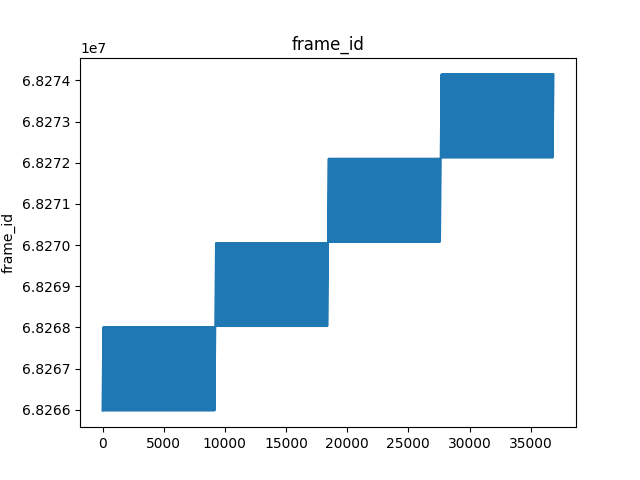

<IPython.core.display.Javascript object>


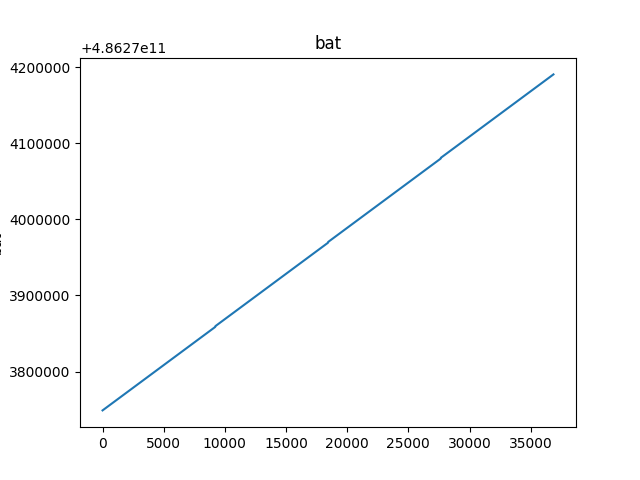

<IPython.core.display.Javascript object>


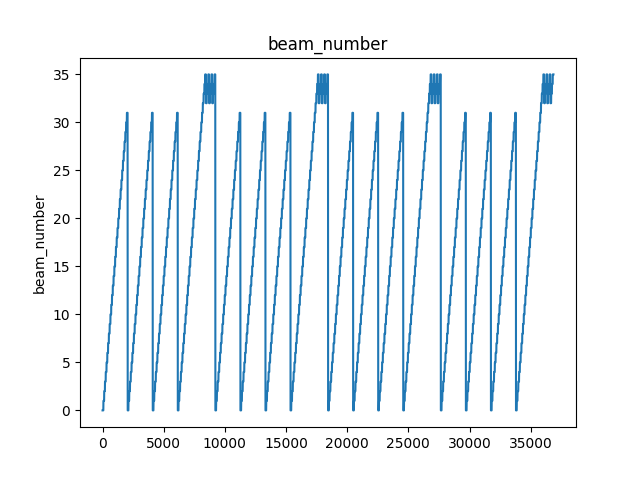

<IPython.core.display.Javascript object>


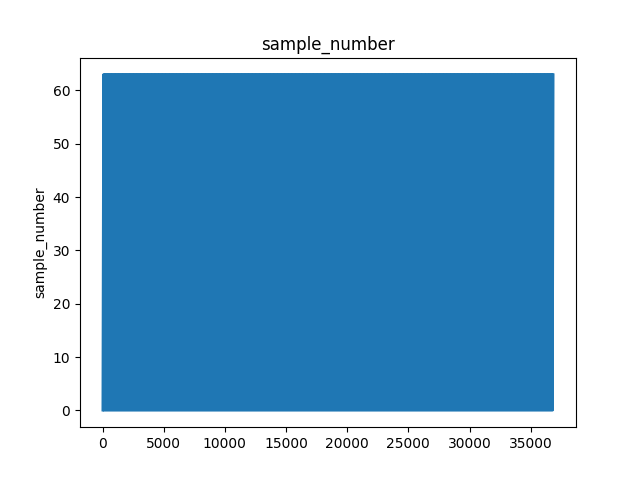

<IPython.core.display.Javascript object>


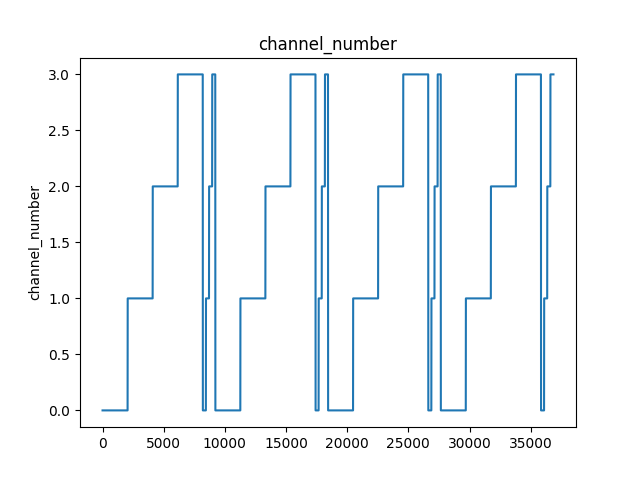

<IPython.core.display.Javascript object>


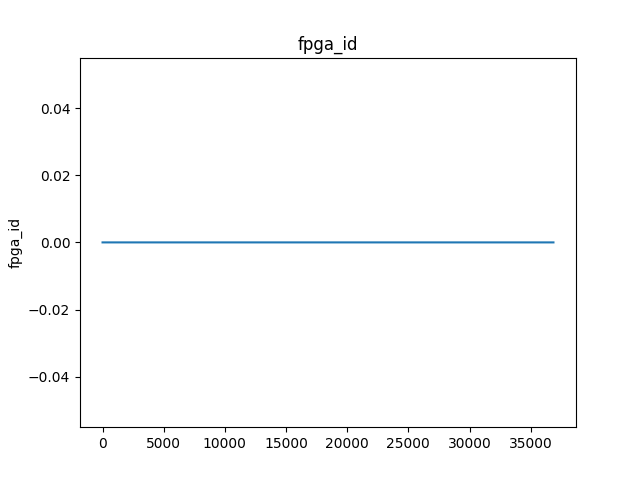

<IPython.core.display.Javascript object>


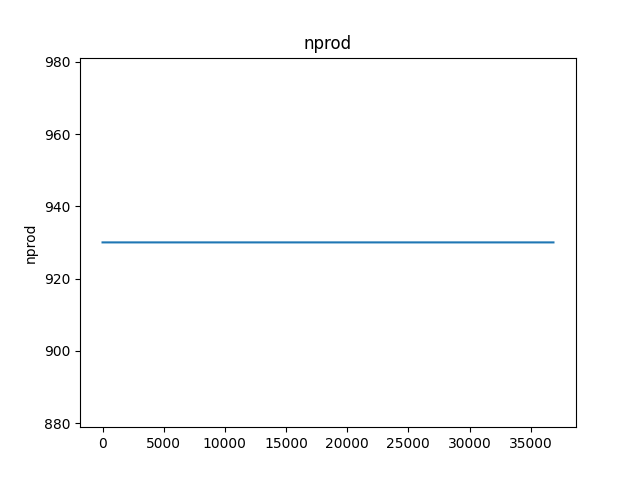

<IPython.core.display.Javascript object>


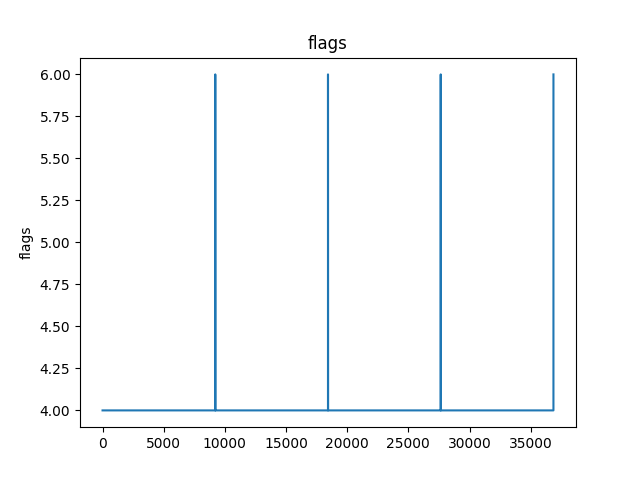

<IPython.core.display.Javascript object>


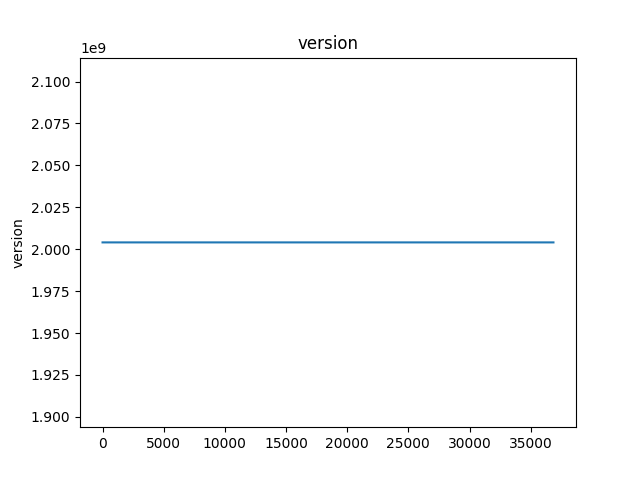

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

In [192]:
plot_metadata(packets)

In [195]:
np.save('packets_tst.npy', packets_tst)
np.save('packets_lsb12.npy', packets_lsb12)

In [194]:
!ls -lrth packets_*.npy
!realpath packets_*.npy

-rw-rw-r-- 1 ban115 ban115 100M May 17 09:44 packets_tst.npy
-rw-rw-r-- 1 ban115 ban115 100M May 17 09:44 packets_lsb12.npy
/data/craco/ban115/craco-python/notebooks/packets_lsb12.npy
/data/craco/ban115/craco-python/notebooks/packets_tst.npy


In [102]:
freqs = np.array('983.5 983.519 983.537 983.556 983.574 983.593 983.611 983.63 983.648 984.5 984.519 984.537 984.556 984.574 984.593 984.611 984.63 984.648 985.5 985.519 985.537 985.556 985.574 985.593 985.611 985.63 985.648 986.5 986.519 986.537 986.556 986.574 986.593 986.611 986.63 986.648 983.667 983.685 983.704 983.722 983.741 983.759 983.778 983.796 983.815 984.667 984.685 984.704 984.722 984.741 984.759 984.778 984.796 984.815 985.667 985.685 985.704 985.722 985.741 985.759 985.778 985.796 985.815 986.667 986.685 986.704 986.722 986.741 986.759 986.778 986.796 986.815 983.833 983.852 983.87 983.889 983.907 983.926 983.944 983.963 983.981 984.833 984.852 984.87 984.889 984.907 984.926 984.944 984.963 984.981 985.833 985.852 985.87 985.889 985.907 985.926 985.944 985.963 985.981 986.833 986.852 986.87 986.889 986.907 986.926 986.944 986.963 986.981 984 984.019 984.037 984.056 984.074 984.093 984.111 984.13 984.148 985 985.019 985.037 985.056 985.074 985.093 985.111 985.13 985.148 986 986.019 986.037 986.056 986.074 986.093 986.111 986.13 986.148 987 987.019 987.037 987.056 987.074 987.093 987.111 987.13 987.148 984.167 984.185 984.204 984.222 984.241 984.259 984.278 984.296 984.315 985.167 985.185 985.204 985.222 985.241 985.259 985.278 985.296 985.315 986.167 986.185 986.204 986.222 986.241 986.259 986.278 986.296 986.315 987.167 987.185 987.204 987.222 987.241 987.259 987.278 987.296 987.315 984.333 984.352 984.37 984.389 984.407 984.426 984.444 984.463 984.481 985.333 985.352 985.37 985.389 985.407 985.426 985.444 985.463 985.481 986.333 986.352 986.37 986.389 986.407 986.426 986.444 986.463 986.481 987.333 987.352 987.37 987.389 987.407 987.426 987.444 987.463 987.481'.split()).astype(float)

<IPython.core.display.Javascript object>


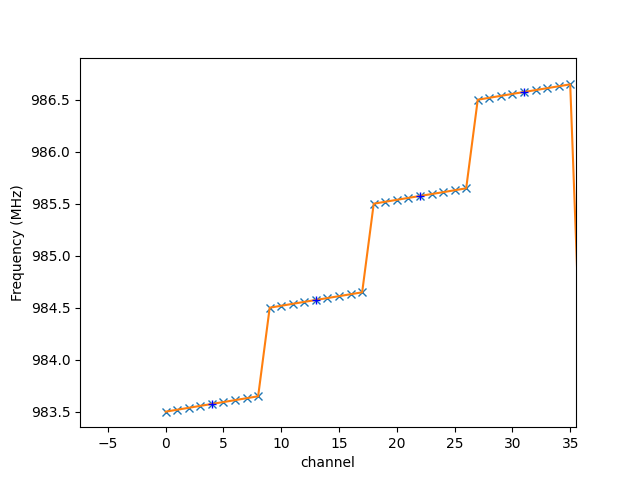

Text(0, 0.5, 'Frequency (MHz)')

In [103]:
figure()
plot(freqs, 'x')
plot(freqs)
fpga_freqs = freqs.reshape(6, 4, 9).mean(axis=2)
plot(np.arange(0, len(freqs), 9)+4, fpga_freqs.flat, 'b+')
xlabel('channel')
ylabel('Frequency (MHz)')

In [104]:
fpga_freqs

array([[983.57422222, 984.57422222, 985.57422222, 986.57422222],
       [983.74077778, 984.74077778, 985.74077778, 986.74077778],
       [983.90722222, 984.90722222, 985.90722222, 986.90722222],
       [984.07422222, 985.07422222, 986.07422222, 987.07422222],
       [984.24077778, 985.24077778, 986.24077778, 987.24077778],
       [984.40722222, 985.40722222, 986.40722222, 987.40722222]])

<IPython.core.display.Javascript object>


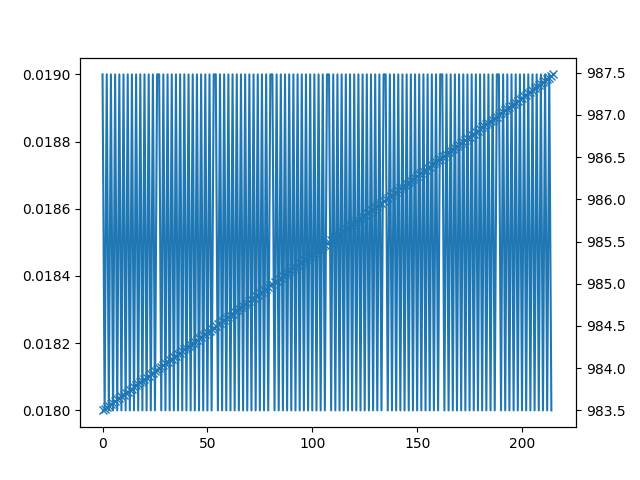

In [105]:
figure()
sort_freqs = sort(freqs.flat)
foff = sort_freqs[1:] - sort_freqs[:-1]
plot(foff)
#assert np.all(foff) == foff[0] rounding errors probably hurting here
twinx()
plot(sort(freqs.flat),'x')

In [107]:
packets['version']

array([2004071455, 4191028034, 4243388586, ..., 4240507418, 4291033212,
         79100505], dtype=uint32)

In [163]:
list(products[autoidxs2]).index((1,1))

/data/craco/ban115/craco-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  """Entry point for launching an IPython kernel.


ValueError: (1, 1) is not in list

In [168]:
for v in list(products[autoidxs2]):
    print(v, tuple(v) == (1,1), type(v), type((1,1)))


(1, 1) True <class 'numpy.void'> <class 'tuple'>
(2, 2) False <class 'numpy.void'> <class 'tuple'>
(2, 6) False <class 'numpy.void'> <class 'tuple'>
(2, 7) False <class 'numpy.void'> <class 'tuple'>
(2, 8) False <class 'numpy.void'> <class 'tuple'>
(2, 9) False <class 'numpy.void'> <class 'tuple'>
(3, 3) False <class 'numpy.void'> <class 'tuple'>
(4, 4) False <class 'numpy.void'> <class 'tuple'>
(5, 5) False <class 'numpy.void'> <class 'tuple'>
(6, 6) False <class 'numpy.void'> <class 'tuple'>
(6, 7) False <class 'numpy.void'> <class 'tuple'>
(6, 8) False <class 'numpy.void'> <class 'tuple'>
(6, 9) False <class 'numpy.void'> <class 'tuple'>
(6, 11) False <class 'numpy.void'> <class 'tuple'>
(6, 15) False <class 'numpy.void'> <class 'tuple'>
(6, 20) False <class 'numpy.void'> <class 'tuple'>
(6, 24) False <class 'numpy.void'> <class 'tuple'>
(6, 29) False <class 'numpy.void'> <class 'tuple'>
(7, 7) False <class 'numpy.void'> <class 'tuple'>
(7, 11) False <class 'numpy.void'> <class 'tup